<a href="https://colab.research.google.com/github/manogna1105/villageconnect_classifier/blob/main/villageconnect_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully
  village_type     request_type urgency_level population_range  \
0        rural     medical_help          high            small   
1        rural  school_facility        medium           medium   
2   semi_rural       crop_issue          high            large   
3       tribal     water_supply          high            small   
4        rural      road_repair        medium           medium   

  service_category  
0       Healthcare  
1        Education  
2      Agriculture  
3   Infrastructure  
4   Infrastructure  

✅ Data encoded successfully
   village_type  request_type  urgency_level  population_range  \
0             0            12              0                 2   
1             0            16              2                 1   
2             1             3              0                 0   
3             2            19              0                 2   
4             0            14              2                 1   

   service_category  

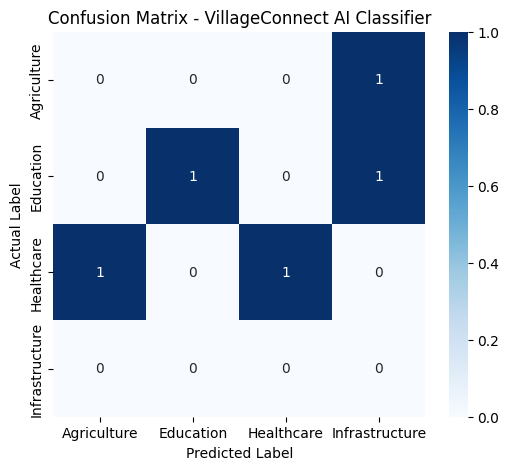


🧪 Test Data Predictions:
Request 1 → Predicted Service: Healthcare
Request 2 → Predicted Service: Agriculture
Request 3 → Predicted Service: Education
Request 4 → Predicted Service: Infrastructure
Request 5 → Predicted Service: Healthcare
Request 6 → Predicted Service: Agriculture
Request 7 → Predicted Service: Education
Request 8 → Predicted Service: Infrastructure


In [40]:

""" VillageConnect AI Classifier"""

# 1. Import Required Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 2. Load Dataset

data = pd.read_csv("villageconnect_data.csv")
print("✅ Dataset loaded successfully")
print(data.head())

label_encoders = {}

for column in data.columns:
    if data[column].dtype == "object":
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

print("\n✅ Data encoded successfully")
print(data.head())
X = data.drop("service_category", axis=1)
y = data["service_category"]

# 3. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=43
)

# 4. Train the Model

model = RandomForestClassifier(
    n_estimators=150,
    random_state=42
)

model.fit(X_train, y_train)
print("\n✅ Model training completed")


# 5. Model Evaluation

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("📊 Model Accuracy:", round(accuracy * 100, 2), "%")

# 6. Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# 7. Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoders["service_category"].classes_,
    yticklabels=label_encoders["service_category"].classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - VillageConnect AI Classifier")
plt.show()

# 8. Predict for Multiple New Inputs

test_requests = pd.DataFrame({
    "village_type": [
        "rural", "tribal", "semi_rural", "rural",
        "tribal", "semi_rural", "rural", "tribal"
    ],
    "request_type": [
        "medical_help", "crop_issue", "school_books", "road_repair",
        "medical_camp", "seed_distribution", "teacher_requirement", "water_supply"
    ],
    "urgency_level": [
        "high", "medium", "low", "medium",
        "high", "medium", "low", "high"
    ],
    "population_range": [
        "small", "large", "small", "medium",
        "small", "large", "medium", "small"
    ]
})

# 9. Encode test inputs
for column in test_requests.columns:
    test_requests[column] = label_encoders[column].transform(test_requests[column])

test_predictions = model.predict(test_requests)

# 10.Decode predictions
decoded_predictions = label_encoders["service_category"].inverse_transform(
    test_predictions
)

print("\n🧪 Test Data Predictions:")
for i, result in enumerate(decoded_predictions):
    print(f"Request {i+1} → Predicted Service: {result}")
